In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

%matplotlib inline
matplotlib.style.use('ggplot')

In [2]:
fac = pd.read_csv('facup_v1.csv')

In [3]:
fac.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 68543 entries, 0 to 68542
Data columns (total 13 columns):
away_score    68543 non-null float64
away_team     68543 non-null object
date          68543 non-null object
home_score    68543 non-null float64
home_team     68543 non-null object
match_id      68543 non-null int64
qualifier     68543 non-null bool
replay        68543 non-null bool
round         68543 non-null object
round_id      68543 non-null int64
stage         68543 non-null float64
year          68543 non-null int64
year_id       68543 non-null int64
dtypes: bool(2), float64(3), int64(4), object(4)
memory usage: 6.4+ MB


In [4]:
fac.head()

,away_score,away_team,date,home_score,home_team,match_id,qualifier,replay,round,round_id,stage,year,year_id
0,0,Crystal Palace (1),09.03.72,3,Royal Engineers,16066,False,True,Semi-Final,10682,4,1872,71234
1,0,Queen's Park (Glasgow),05.03.72,0,Wanderers,16065,False,False,Semi-Final,10682,4,1872,71234
2,0,Crystal Palace (1),17.02.72,0,Royal Engineers,16064,False,False,Semi-Final,10682,4,1872,71234
3,0,Queen's Park (Glasgow),01.01.01,0,Wanderers,16067,False,True,Semi-Final,10682,4,1872,71234
4,5,Royal Engineers,10.01.72,0,Hitchin,16057,False,False,Second Round Proper,10681,2,1872,71234


In [5]:
fac.describe()

,away_score,home_score,match_id,qualifier,replay,round_id,stage,year,year_id
count,68543.000000,68543.000000,68543.000000,68543,68543,68543.000000,68543.000000,68543.000000,68543.000000
mean,1.467794,2.078272,70485.897480,0.757729,0.177772,11230.635616,3.837299,1961.280714,71715.015363
std,1.456992,1.871273,216475.419874,0.428461,0.382323,945.099149,2.692718,36.898787,1336.163621
min,0.000000,0.000000,11.000000,False,False,0.000000,1.000000,1872.000000,71040.000000
25%,0.000000,1.000000,32106.500000,1,0,10975.000000,2.000000,1930.000000,71267.000000
50%,1.000000,2.000000,49305.000000,1,0,11369.000000,3.000000,1966.000000,71297.000000
75%,2.000000,3.000000,66465.500000,1,0,11778.500000,5.000000,1994.000000,71329.000000
max,14.000000,26.000000,5000119.000000,True,True,12829.000000,14.000000,2015.000000,75823.000000


In [6]:
fac[fac.home_score == 26]

,away_score,away_team,date,home_score,home_team,match_id,qualifier,replay,round,round_id,stage,year,year_id
1396,0,Hyde,15.10.87,26,Preston North End,17366,False,False,First Round Proper,10784,1,1888,71250


26 - 0 is the FA Cup record for heaviest defeat! [link](http://news.bbc.co.uk/sport1/hi/funny_old_game/1272025.stm)

Finding number of matches per year and plotting

In [7]:
matches_per_year = fac.groupby('year')['match_id'].nunique().reindex(range(1872,2016))

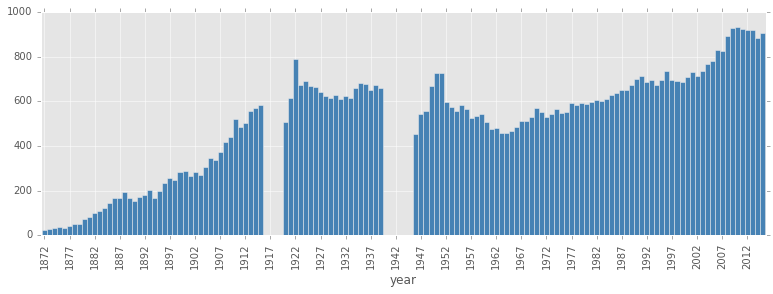

In [8]:
ax = matches_per_year.plot(kind='bar', 
                         figsize=(13,4), 
                         width=1, 
                         color='steelblue')

ticks = ax.xaxis.get_ticklocs()
ticklabels = [l.get_text() for l in ax.xaxis.get_ticklabels()]
ax.xaxis.set_ticks(ticks[::5])
ax.xaxis.set_ticklabels(ticklabels[::5])

plt.show()

Breaking the number of matches per year down into qualifiers and 'proper' matches

In [9]:
#no. of qualifiers/non qualifiers per year

q = fac[fac['qualifier'] == True] 
nq = fac[fac['qualifier'] == False]

q_per_year = q.groupby('year')['match_id'].nunique().reindex(range(1872,2016)) * -1
nq_per_year = nq.groupby('year')['match_id'].nunique().reindex(range(1872,2016))

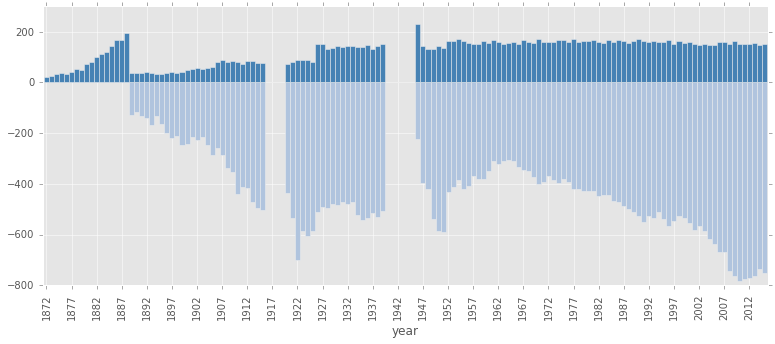

In [10]:
q_per_year.plot(kind='bar', 
                 figsize=(13,5), 
                 width=1, 
                 color='lightsteelblue')

ax = plt.gca()

nq_per_year.plot(kind='bar', 
                 width=1, 
                 color='steelblue',
                 ax = ax, 
                 ylim = (-800, 300))

ticks = ax.xaxis.get_ticklocs()
ticklabels = [l.get_text() for l in ax.xaxis.get_ticklabels()]
ax.xaxis.set_ticks(ticks[::5])
ax.xaxis.set_ticklabels(ticklabels[::5])
ax.legend().set_visible(False)

plt.show()

Despite a widely variable number of qualifying matches since WWII the number of 'proper' matches each year has remained relatively consistent

#### Why do qualifiers start in 1889?

According to Wikipedia:
>"The FA Cup, from this season onwards, began to incorporate a series of qualifying rounds in order to determine qualifiers for the actual Cup competition itself. The qualifying rounds were made up of amateur teams, semi-professional teams, and professional sides not yet associated with the Football League."

#### Why are there so many matches in 1946?

In [11]:
fac[(fac.year == 1946) & (fac.qualifier == False) & (fac.replay == False)]['round'].value_counts()

First Round Proper     34
Third Round Proper     32
Second Round Proper    17
Fourth Round Proper    16
Fifth Round Proper      8
Sixth Round Proper      4
Semi-Final              2
Final                   1
Name: round, dtype: int64

In [12]:
fac[(fac.year == 1947) & (fac.qualifier == False) & (fac.replay == False)]['round'].value_counts()

First Round Proper     34
Third Round Proper     32
Second Round Proper    17
Fourth Round Proper    16
Fifth Round Proper      8
Sixth Round Proper      4
Semi-Final              2
Final                   1
Name: round, dtype: int64

Both 1946 and 1947 have the same number of matches (excluding replays) so extra matches must be due to replays?

In [13]:
fac[(fac.year == 1946) & (fac.qualifier == False) & (fac.replay == True)]['round'].value_counts()

First Round Proper     34
Third Round Proper     34
Second Round Proper    17
Fourth Round Proper    17
Fifth Round Proper      8
Sixth Round Proper      4
Semi-Final              1
Name: round, dtype: int64

We can see that every match had at least one replay in 1946! According to Wikipedia:

>"For the only time in the history of the competition, all matches from the First Round Proper up to and including the Sixth Round Proper were played over two legs ... These changes were made in order to give clubs additional revenue, as the Football League would not resume normal play until the autumn of 1946."

#### Plotting number of matches per round

In [14]:
# we need to reverse 'stage' and create 'stage_f' that 'hangs' stages off final (now always equal to 14) rather than initial round

fac['stage_f'] = 15 - fac.groupby('year')['stage'].rank(method = 'dense', ascending = False)


# testing on 1996
fac[fac.year == 1996].groupby('stage').first()


,away_score,away_team,date,home_score,home_team,match_id,qualifier,replay,round,round_id,year,year_id,stage_f
stage,,,,,,,,,,,,,
1,2,Kingsbury Town,05.09.95,3,Bracknell Town,68628,True,True,Preliminary Round,9443,1996,71044,2
2,1,Worthing,22.09.95,6,Buckingham Town,68804,True,True,First Qualifying Round,9444,1996,71044,3
3,2,Bromley,02.10.95,1,Welling United,68891,True,True,Second Qualifying Round,9445,1996,71044,4
4,3,Cinderford Town,16.10.95,1,Forest Green Rovers,68937,True,True,Third Qualifying Round,9446,1996,71044,5
5,0,Marlow,30.10.95,4,Ebbsfleet United,68972,True,True,Fourth Qualifying Round,9447,1996,71044,6
6,2,Crewe Alexandra,22.11.95,0,Altrincham,68974,False,False,First Round Proper,9448,1996,71044,7
7,0,Fulham,14.12.95,0,Brighton & Hove Albion,69044,False,True,Second Round Proper,9449,1996,71044,8
8,1,Barnsley,23.01.96,2,Oldham Athletic,69086,False,True,Third Round Proper,9450,1996,71044,9
9,4,Liverpool,18.02.96,0,Shrewsbury Town,69107,False,False,Fourth Round Proper,9451,1996,71044,10


In [15]:
non_q = fac[fac['qualifier'] == False] #only plotting non qualifiers as we will be dropping qualifier data soon

In [16]:
matches_per_stage = non_q.groupby(['year', 'stage_f'])['match_id'].nunique().unstack().reindex(range(1872,2016))

matches_per_stage.head()

stage_f,7.0,8.0,9.0,10.0,11.0,12.0,13.0,14.0
year,,,,,,,,
1872,NaN,NaN,NaN,8,6,3,4,1
1873,NaN,NaN,9,7,4,3,2,1
1874,NaN,NaN,NaN,16,9,5,2,1
1875,NaN,NaN,NaN,19,8,5,3,2
1876,NaN,NaN,NaN,17,8,4,2,2


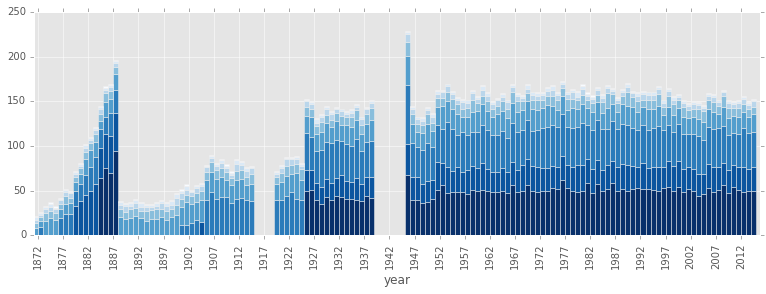

In [17]:
ax = matches_per_stage.plot(kind='bar', 
                       figsize=(13,4), 
                       width=1, 
                       stacked=True, 
                       colormap = 'Blues_r')

ticks = ax.xaxis.get_ticklocs()
ticklabels = [l.get_text() for l in ax.xaxis.get_ticklabels()]
ax.xaxis.set_ticks(ticks[::5])
ax.xaxis.set_ticklabels(ticklabels[::5])
ax.legend().set_visible(False)

plt.show()

There seems to be an anomalous value in 1905

In [18]:
matches_per_stage.loc[1903:1905]

stage_f,7.0,8.0,9.0,10.0,11.0,12.0,13.0,14.0
year,,,,,,,,
1903,NaN,NaN,14,21,9,4,2,1
1904,NaN,NaN,17,20,10,6,2,1
1905,NaN,15,NaN,25,10,5,3,1


In [19]:
fac[(fac.year == 1905)].groupby('round').first().sort_values('stage')

,away_score,away_team,date,home_score,home_team,match_id,qualifier,replay,round_id,stage,year,year_id,stage_f
round,,,,,,,,,,,,,
Extra Preliminary Round,0,Rotherham Town,14.09.04,1,Thornhill United,21199,True,True,10959,1,1905,71267,1
Preliminary Round,0,Leadgate Park,24.09.04,1,Stanley United,21250,True,True,10966,2,1905,71267,2
First Qualifying Round,2,Oswestry United,10.10.04,3,Druids,21324,True,True,10962,3,1905,71267,3
Second Qualifying Round,4,Civil Service,22.10.04,4,Kensal Rise,21369,True,True,10967,4,1905,71267,4
Third Qualifying Round,2,Kettering Town,07.11.04,1,Wellingborough Town,21414,True,True,10971,5,1905,71267,5
Fourth Qualifying Round,0,Glossop,23.11.04,1,Stockport County,21447,True,True,10964,6,1905,71267,6
Fifth Qualifying Round,2,Sunderland West End,07.12.04,1,Bishop Auckland,21461,True,True,10960,7,1905,71267,7
Intermediate Round,1,Fulham,23.01.05,0,Manchester United,21489,False,True,10965,8,1905,71267,8
Sixth Qualifying Round,2,Barnsley,15.12.04,1,Burslem Port Vale,21472,True,True,10970,9,1905,71267,9


The dates show us that the intermediate and 6th qualifying stages are in wrong order (also on data source). Will now check if any other intermediate stages are affected.

In [20]:
fac[fac['round'] == 'Intermediate Round'].groupby('year').first()

,away_score,away_team,date,home_score,home_team,match_id,qualifier,replay,round,round_id,stage,year_id,stage_f
year,,,,,,,,,,,,,
1901,1,Bristol City,14.01.01,2,Reading,20292,False,True,Intermediate Round,10915,7,71263,9
1902,0,Millwall Athletic,18.12.01,1,Bristol Rovers,20570,False,True,Intermediate Round,10927,7,71264,9
1903,0,Bristol Rovers,22.12.02,2,Millwall Athletic,20847,False,True,Intermediate Round,10939,7,71265,9
1904,1,Small Heath,11.01.04,3,Manchester United,21149,False,True,Intermediate Round,10952,8,71266,9
1905,1,Fulham,23.01.05,0,Manchester United,21489,False,True,Intermediate Round,10965,8,71267,8


In [21]:
def inter_check(g_year):
    g_year['date'] = pd.to_datetime(g_year['date'], dayfirst=True) # setting date format
    inter = g_year[g_year['round'] == 'Intermediate Round'].iloc[0] #assinging  first row from intermediate round

    if inter['date'] < g_year[g_year['stage'] == inter['stage'] + 1].iloc[0]['date']: #comparing date to next stage numerically
        return g_year['year'].max(), True
    else:
        return g_year['year'].max(), False

fac[fac.year.isin(range(1901, 1906))].groupby('year').apply(inter_check)

year
1901     (1901, True)
1902     (1902, True)
1903     (1903, True)
1904     (1904, True)
1905    (1905, False)
dtype: object

There are 5 years in total with intermediate round and only 1905 needs fixing

In [22]:
fac.loc[(fac['year'] == 1905) & (fac['round'] == 'Intermediate Round'), 'stage'] = 9
fac.loc[(fac['year'] == 1905) & (fac['round'] == 'Sixth Qualifying Round'), 'stage'] = 8

Recreating matches per round plot

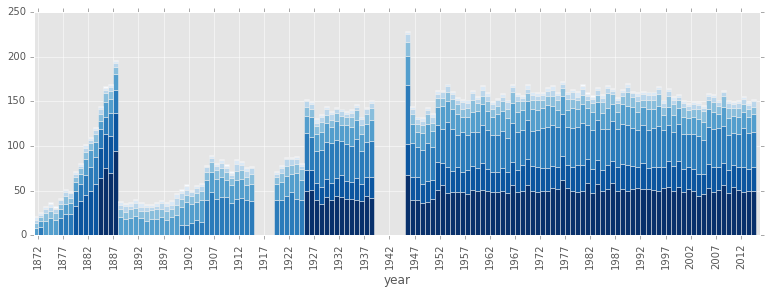

In [23]:
fac['stage_f'] = 15 - fac.groupby('year')['stage'].rank(method = 'dense', ascending = False)

non_q = fac[fac['qualifier'] == False]

matches_per_stage = non_q.groupby(['year', 'stage_f'])['match_id'].nunique().unstack().reindex(range(1872,2016))

ax = matches_per_stage.plot(kind='bar', 
                       figsize=(13,4), 
                       width=1, 
                       stacked=True, 
                       colormap = 'Blues_r')

ticks = ax.xaxis.get_ticklocs()
ticklabels = [l.get_text() for l in ax.xaxis.get_ticklabels()]
ax.xaxis.set_ticks(ticks[::5])
ax.xaxis.set_ticklabels(ticklabels[::5])
ax.legend().set_visible(False)

plt.show()

sorted :) 

#### Plotting number of teams per round


In [24]:
non_qr = fac[(fac['qualifier'] == False) & (fac['replay'] == False)]

In [25]:
nonr_per_stage = non_qr.groupby(['year', 'stage_f'])['match_id'].nunique().unstack().reindex(range(1872,2016))

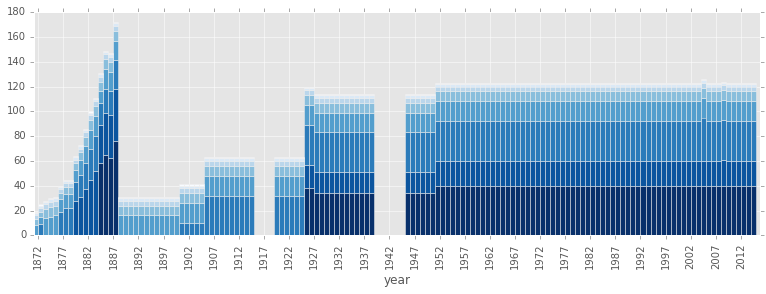

In [26]:
ax = nonr_per_stage.plot(kind='bar', 
                       figsize=(13,4), 
                       width=1, 
                       stacked=True, 
                       colormap = 'Blues_r')

ticks = ax.xaxis.get_ticklocs()
ticklabels = [l.get_text() for l in ax.xaxis.get_ticklabels()]
ax.xaxis.set_ticks(ticks[::5])
ax.xaxis.set_ticklabels(ticklabels[::5])
ax.legend().set_visible(False)

plt.show()

In [27]:
# some matches are replays but don't have replay tag on source data, fixing this

rep = fac.match_id.isin([89432, 75597, 75586, 75584])

fac.ix[rep, 'replay'] = True

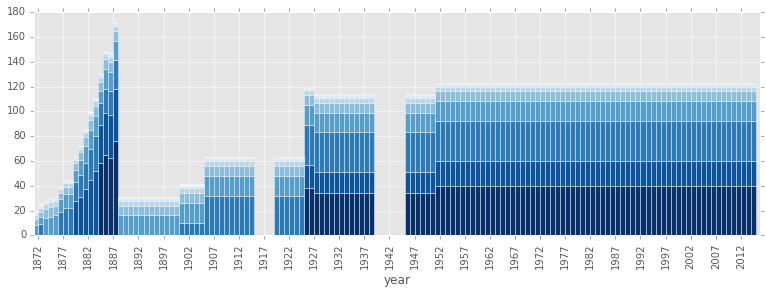

In [28]:
non_qr = fac[(fac['qualifier'] == False) & (fac['replay'] == False)]

nonr_per_stage = non_qr.groupby(['year', 'stage_f'])['match_id'].nunique().unstack().reindex(range(1872,2016))

ax = nonr_per_stage.plot(kind='bar', 
                       figsize=(13,4), 
                       width=1, 
                       stacked=True, 
                       colormap = 'Blues_r')

ticks = ax.xaxis.get_ticklocs()
ticklabels = [l.get_text() for l in ax.xaxis.get_ticklabels()]
ax.xaxis.set_ticks(ticks[::5])
ax.xaxis.set_ticklabels(ticklabels[::5])
ax.legend().set_visible(False)

plt.show()

In [29]:
fac.to_csv('facup_v2.csv', index = False)